# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
#To run this from local machine please use "from api_keys import weather_api_key" not config as config is not loaded for security reasons
#from api_keys import weather_api_key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("print log for API call")
print("----------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processed city record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping to next")

print("-----------------------")
print("API Complete")
print("-----------------------")

print log for API call
----------------------
Processed city record 1 of Set 1 : rikitea
Processed city record 2 of Set 1 : hilo
Processed city record 3 of Set 1 : quang ngai
Processed city record 4 of Set 1 : mataura
Processed city record 5 of Set 1 : vaini
Processed city record 6 of Set 1 : kodiak
Processed city record 7 of Set 1 : cape town
Processed city record 8 of Set 1 : hamilton
Processed city record 9 of Set 1 : turku
Processed city record 10 of Set 1 : hermanus
Processed city record 11 of Set 1 : tawau
Processed city record 12 of Set 1 : balabac
Processed city record 13 of Set 1 : beberibe
Processed city record 14 of Set 1 : drezdenko
Processed city record 15 of Set 1 : bluff
Processed city record 16 of Set 1 : saldanha
Processed city record 17 of Set 1 : upernavik
Processed city record 18 of Set 1 : ushuaia
City not found. Skipping to next
Processed city record 19 of Set 1 : yellowknife
Processed city record 20 of Set 1 : jamestown
Processed city record 21 of Set 1 : ribeira

Processed city record 19 of Set 4 : darhan
Processed city record 20 of Set 4 : fort portal
Processed city record 21 of Set 4 : mount isa
Processed city record 22 of Set 4 : menton
Processed city record 23 of Set 4 : makat
Processed city record 24 of Set 4 : newburgh
Processed city record 25 of Set 4 : banting
Processed city record 26 of Set 4 : chokurdakh
City not found. Skipping to next
Processed city record 27 of Set 4 : fomboni
Processed city record 28 of Set 4 : coffs harbour
Processed city record 29 of Set 4 : marzuq
Processed city record 30 of Set 4 : laguna
Processed city record 31 of Set 4 : cherskiy
Processed city record 32 of Set 4 : sembakung
Processed city record 33 of Set 4 : bilibino
Processed city record 34 of Set 4 : mantua
Processed city record 35 of Set 4 : burns lake
Processed city record 36 of Set 4 : am timan
Processed city record 37 of Set 4 : namatanai
Processed city record 38 of Set 4 : key largo
Processed city record 39 of Set 4 : ndele
Processed city record 40

Processed city record 42 of Set 7 : sinnamary
Processed city record 43 of Set 7 : longyearbyen
Processed city record 44 of Set 7 : mugur-aksy
Processed city record 45 of Set 7 : palamos
Processed city record 46 of Set 7 : nioki
Processed city record 47 of Set 7 : abu samrah
Processed city record 48 of Set 7 : tripoli
Processed city record 49 of Set 7 : vrangel
Processed city record 50 of Set 7 : baruun-urt
Processed city record 0 of Set 8 : theunissen
Processed city record 1 of Set 8 : alice springs
City not found. Skipping to next
City not found. Skipping to next
Processed city record 2 of Set 8 : olbia
Processed city record 3 of Set 8 : hami
Processed city record 4 of Set 8 : oban
Processed city record 5 of Set 8 : canoinhas
City not found. Skipping to next
Processed city record 6 of Set 8 : bilma
City not found. Skipping to next
City not found. Skipping to next
Processed city record 7 of Set 8 : yulara
City not found. Skipping to next
Processed city record 8 of Set 8 : fairbanks
Pro

Processed city record 5 of Set 11 : malpe
Processed city record 6 of Set 11 : hanna
Processed city record 7 of Set 11 : nuuk
Processed city record 8 of Set 11 : kaeo
Processed city record 9 of Set 11 : yerbogachen
Processed city record 10 of Set 11 : villa maria
Processed city record 11 of Set 11 : pemangkat
Processed city record 12 of Set 11 : rawson
Processed city record 13 of Set 11 : beringovskiy
Processed city record 14 of Set 11 : banda aceh
Processed city record 15 of Set 11 : dzhebariki-khaya
Processed city record 16 of Set 11 : esso
Processed city record 17 of Set 11 : vysokogornyy
Processed city record 18 of Set 11 : monrovia
Processed city record 19 of Set 11 : ust-ishim
Processed city record 20 of Set 11 : lazurne
Processed city record 21 of Set 11 : sistranda
Processed city record 22 of Set 11 : karlshamn
Processed city record 23 of Set 11 : meulaboh
Processed city record 24 of Set 11 : port blair
Processed city record 25 of Set 11 : mangrol
Processed city record 26 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_data = pd.DataFrame({"City" : city_name_list, "Cloudiness" : cloudiness_list,"Country" : country_list,
                        "Date" : date_list, "Humidity" : humidity_list, "Lat" : lat_list, "Lng" : lng_list,
                        "Max Temp" : max_temp_list, "Wind Speed" : wind_speed_list})
city_data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,13,PF,1623605439,76,-23.1203,-134.9692,74.95,10.07
1,Hilo,40,US,1623605459,77,19.7297,-155.0900,75.61,6.91
2,Quang Ngai,98,VN,1623605459,75,15.1167,108.8000,79.30,4.45
3,Mataura,100,NZ,1623605460,97,-46.1927,168.8643,50.85,4.56
4,Vaini,40,TO,1623605460,83,-21.2000,-175.2000,71.76,8.05
...,...,...,...,...,...,...,...,...,...
558,Ust-Maya,46,RU,1623605682,96,60.4167,134.5333,41.41,3.04
559,Mnogovershinnyy,98,RU,1623605682,62,53.9353,139.9242,37.51,1.16
560,Krasnosel'kup,74,RU,1623605683,56,65.7000,82.4667,50.74,9.60
561,Goderich,85,CA,1623605683,77,43.7501,-81.7165,78.03,10.36


In [14]:
city_data.to_csv("cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
city_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,56.568384,1.623606e+09,69.076377,21.537162,23.101066,69.711901,7.667442
std,36.761473,8.650090e+01,22.231623,32.554310,89.779744,15.959181,5.324568
min,0.000000,1.623605e+09,5.000000,-54.800000,-175.200000,32.230000,0.000000
25%,20.000000,1.623606e+09,58.000000,-3.122250,-55.360950,57.750000,3.870000
50%,66.000000,1.623606e+09,74.000000,24.687700,26.400000,72.810000,6.820000
75%,91.000000,1.623606e+09,85.000000,48.616500,102.272600,81.195000,10.255000
max,100.000000,1.623606e+09,100.000000,78.218600,179.316700,108.340000,29.860000


In [18]:
#  Get the indices of cities that have humidity over 100%.
city_weather_humid = city_data[(city_data["Humidity"] > 100)].index
city_weather_humid

Int64Index([], dtype='int64')

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(city_weather_humid, inplace=False)

clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,13,PF,1623605439,76,-23.1203,-134.9692,74.95,10.07
1,Hilo,40,US,1623605459,77,19.7297,-155.0900,75.61,6.91
2,Quang Ngai,98,VN,1623605459,75,15.1167,108.8000,79.30,4.45
3,Mataura,100,NZ,1623605460,97,-46.1927,168.8643,50.85,4.56
4,Vaini,40,TO,1623605460,83,-21.2000,-175.2000,71.76,8.05


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

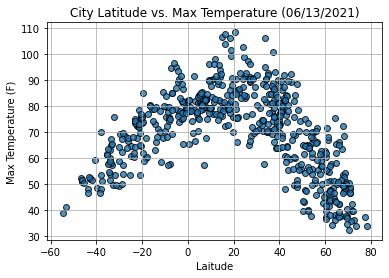

In [27]:
# Latitude vs. Temperature Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Max Temperature (06/13/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(True)

# Save as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

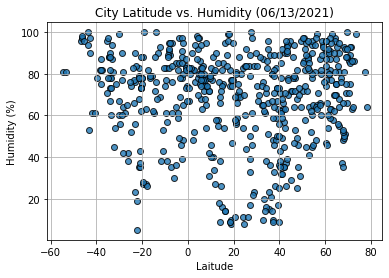

In [31]:
# Latitude vs. Humidity Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolor = "black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Humidity (06/13/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(True)

# Save figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

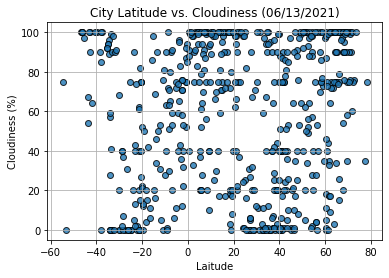

In [35]:
# Latitude vs. Cloudiness Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolor = "black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Cloudiness (06/13/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(True)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

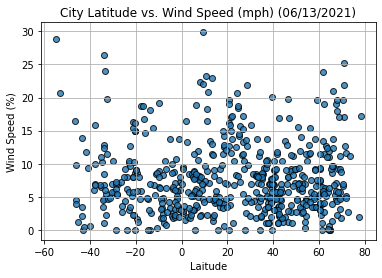

In [37]:
# Latitude vs. Wind Speed
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolor = "black",
            linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (mph) (06/13/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set grid line
plt.grid(True)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression